## Random bidding strategy 2: max. bid price as bid price boundaries

In [16]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

#Import validation and testing data sets
rtb_train = pd.read_csv("train.csv")
rtb_train_cropped = rtb_train[['payprice','click','bidprice']]
rtb_validation = pd.read_csv("validation.csv")
rtb_validation_cropped = rtb_validation[['payprice','click']]

In [7]:
#Determine bid prices boundaries with Standard deviation intervalls
meanPayPrice = rtb_validation_cropped['payprice'].mean()
payPriceStd = rtb_validation_cropped['payprice'].std()
print(meanPayPrice)
print(payPriceStd)
maxPrice = (rtb_train_cropped.loc[:,"payprice"].max())
minPrice = (rtb_train_cropped.loc[:,"payprice"].min())


78.23400509994242
60.026062850969545


In [11]:
constantPrice = 0
bidPriceList = []
count = 0

#Determine upper bid price boundaries for the constant bid range
while (count < 300):
    constantPrice +=1
    bidPriceList.append(constantPrice)
    count = count +1
    
numberBids = []
wonBids = []
CTR = [] 
numberClicks = [] 
CPC = [] 
CPM = []
eCPC = []

#Repeating bidding in validation set j times
for j in range (0,len(bidPriceList)):
    budget = 6250
    bids = 0
    impressions = 0
    clicks = 0
    
    #Creates an array of random bid prices in the boundaries declared above
    randomBids = []
    for i in range(0,len(rtb_validation)):
        bid = random.randrange(minPrice,bidPriceList[j],1)
        randomBids.append(bid)
    
    rtb_validation['random_bids'] = randomBids
    
    for i in range(0,len(rtb_validation_cropped)):
        if budget > 0 and budget > (rtb_validation_cropped['payprice'].values[i]/1000):
            impressions += 1
            if (rtb_validation['random_bids'].values[i]/1000) > (rtb_validation_cropped['payprice'].values[i]/1000):
                bids += 1
                clicks += rtb_validation_cropped['click'].values[i]
                budget = budget - (rtb_validation_cropped['payprice'].values[i]/1000)
        else: 
            print("Budget is spent!")
            break
    ctr = (clicks/impressions)*100    
    cpm = 6250/impressions
    if clicks != 0:
        cpc = 6250/clicks
        
    else:
        cpc = 0
        #Output for the alrogithm
    print("Output")
    print(bidPriceList[j])
    numberBids.append(impressions)
    print(numberBids)
    wonBids.append(bids)
    print(wonBids)
    CTR.append(ctr)
    print(CTR)
    numberClicks.append(clicks)
    print(numberClicks)
    CPC.append(cpc)
    print(CPC)
    CPM.append(cpm)
    print(CPM)

Output
1
[303925]
[0]
[0.0]
[0]
[0]
[0.020564283951632803]
Output
2
[303925, 303925]
[0, 45]
[0.0, 0.0]
[0, 0]
[0, 0]
[0.020564283951632803, 0.020564283951632803]
Output
3
[303925, 303925, 303925]
[0, 45, 157]
[0.0, 0.0, 0.0]
[0, 0, 0]
[0, 0, 0]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803]
Output
4
[303925, 303925, 303925, 303925]
[0, 45, 157, 307]
[0.0, 0.0, 0.0, 0.0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803]
Output
5
[303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803]
Output
6
[303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020

Output
18
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00032902854322612487, 0.0009870856296783747, 0.00032902854322612487, 0.0006580570864522497, 0.00032902854322612487, 0.00032902854322612487, 0.0013161141729044995, 0.0006580570864522497, 0.0013161141729044995, 0.0, 0.0009870856296783747]
[0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 2, 1, 1, 4, 2, 4, 0, 3]
[0, 0, 0, 0, 0, 0, 0, 6250.0, 2083.3333333333335, 6250.0, 3125.0, 6250.0, 6250.0, 1562.5, 3125.0, 1562.5, 0, 2083.3333333333335]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.02056428395163280

Output
25
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00032902854322612487, 0.0009870856296783747, 0.00032902854322612487, 0.0006580570864522497, 0.00032902854322612487, 0.00032902854322612487, 0.0013161141729044995, 0.0006580570864522497, 0.0013161141729044995, 0.0, 0.0009870856296783747, 0.0009870856296783747, 0.0016451427161306245, 0.0019741712593567494, 0.0016451427161306245, 0.002632228345808999, 0.002961256889035124, 0.0009870856296783747]
[0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 2, 1, 1, 4, 2, 4, 0, 3, 3, 5, 6, 5, 8, 9, 3]
[0, 0, 0, 0, 0, 0, 0, 6250.0, 2083.3333333333335, 6250.0, 3125.0, 6250.0, 6250.0, 1562.5, 3125.0, 1562.5, 0, 2083.3333333333335,

Output
30
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00032902854322612487, 0.0009870856296783747, 0.00032902854322612487, 0.0006580570864522497, 0.00032902854322612487, 0.00032902854322612487, 0.0013161141729044995, 0.0006580570864522497, 0.0013161141729044995, 0.0, 0.0009870856296783747, 0.0009870856296783747, 0.0016451427161306245, 0.0019741712593567494, 0.0016451427161306245, 0.002632228345808999, 0.002961256889035124, 0.0009870856296783747, 0.0016451427161306245, 0.0016451427161306245, 0.002961256889035124, 0.0019741712593567494, 0.002303199802582874]
[0, 0, 0, 0, 0, 

Output
34
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00032902854322612487, 0.0009870856296783747, 0.00032902854322612487, 0.0006580570864522497, 0.00032902854322612487, 0.00032902854322612487, 0.0013161141729044995, 0.0006580570864522497, 0.0013161141729044995, 0.0, 0.0009870856296783747, 0.0009870856296783747, 0.0016451427161306245, 0.0019741712593567494, 0.0016451427161306245, 0.002632228345808999, 0.002961256889035124, 0.0009870856296783747, 0.0016451427161306245, 0.0016451427161306245, 0.002961256889035124, 0

Output
38
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00032902854322612487, 0.0009870856296783747, 0.00032902854322612487, 0.0006580570864522497, 0.00032902854322612487, 0.00032902854322612487, 0.0013161141729044995, 0.0006580570864522497, 0.0013161141729044995, 0.0, 0.0009870856296783747, 0.0009870856296783747, 0.0016451427161306245, 0.0019741712593567494, 0.0016451427161306245, 0.002632228345808999, 0.002961256889035124, 0.0009870856296783747, 0.0016451

Output
41
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00032902854322612487, 0.0009870856296783747, 0.00032902854322612487, 0.0006580570864522497, 0.00032902854322612487, 0.00032902854322612487, 0.0013161141729044995, 0.0006580570864522497, 0.0013161141729044995, 0.0, 0.0009870856296783747, 0.0009870856296783747, 0.0016451427161306245, 0.0019741712593567494, 0.0016451427161306245, 0.002632228345808999, 0.0029612

Output
44
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00032902854322612487, 0.0009870856296783747, 0.00032902854322612487, 0.0006580570864522497, 0.00032902854322612487, 0.00032902854322612487, 0.0013161141729044995, 0.0006580570864522497, 0.0013161141729044995, 0.0, 0.0009870856296783747, 0.0009870856296783747, 0.0016451427161306245, 0.0019741712593567494, 0.0016451

Output
47
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 47229]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00032902854322612487, 0.0009870856296783747, 0.00032902854322612487, 0.0006580570864522497, 0.00032902854322612487, 0.00032902854322612487, 0.0013161141729044995, 0.0006580570864522497, 0.0013161141729044995, 0.0, 0.0009870856296783747, 0.0009870856296783747, 0.00164514

Output
50
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 47229, 48552, 49305, 50688]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00032902854322612487, 0.0009870856296783747, 0.00032902854322612487, 0.0006580570864522497, 0.00032902854322612487, 0.00032902854322612487, 0.0013161141729044995, 0.0006580570864522497, 0.0013161141729044995, 0.0, 0.000987085

Output
53
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 47229, 48552, 49305, 50688, 51644, 52861, 54053]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00032902854322612487, 0.0009870856296783747, 0.00032902854322612487, 0.0006580570864522497, 0.00032902854322612487, 0.00032902854322612487, 0.0013161141729044995, 0.000658057086452

Output
56
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 47229, 48552, 49305, 50688, 51644, 52861, 54053, 54904, 56417, 57854]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00032902854322612487, 0.0009870856296783747, 0.00032902854322612487, 0.0006580570864522497, 0.00032902854322612487, 0.00032902854322612

Output
58
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 47229, 48552, 49305, 50688, 51644, 52861, 54053, 54904, 56417, 57854, 59103, 60444]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00032902854322612487, 0.0009870856296783747, 0.00032902854322612487, 0.0006580570864522497, 0.00032902854

Output
60
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 47229, 48552, 49305, 50688, 51644, 52861, 54053, 54904, 56417, 57854, 59103, 60444, 61471, 62860]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00032902854322612487, 0.0009870856296783747, 0.00032902854322612487, 0.0006

Output
62
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 47229, 48552, 49305, 50688, 51644, 52861, 54053, 54904, 56417, 57854, 59103, 60444, 61471, 62860, 64438, 65312]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00032902854322612487, 0.0009870856296783747, 

Output
64
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 47229, 48552, 49305, 50688, 51644, 52861, 54053, 54904, 56417, 57854, 59103, 60444, 61471, 62860, 64438, 65312, 66783, 67975]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000329028543226

Output
66
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 47229, 48552, 49305, 50688, 51644, 52861, 54053, 54904, 56417, 57854, 59103, 60444, 61471, 62860, 64438, 65312, 66783, 67975, 69078, 70025]
[0.0, 0.0, 0.0, 0.0, 0.

Output
68
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 47229, 48552, 49305, 50688, 51644, 52861, 54053, 54904, 56417, 57854, 59103, 60444, 61471, 62860, 64438, 65312, 66783, 67975, 69078, 70025, 71283, 

Output
70
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 47229, 48552, 49305, 50688, 51644, 52861, 54053, 54904, 56417, 57854, 59103, 60444, 61471, 62860, 64438, 65312, 66783, 67975, 69078

Output
72
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 47229, 48552, 49305, 50688, 51644, 52861, 54053, 54904, 56417, 57854, 59103, 60444, 61471, 62860, 64438, 65312, 667

Output
74
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 47229, 48552, 49305, 50688, 51644, 52861, 54053, 54904, 56417, 57854, 59103, 60444, 61471, 62860, 6

Output
76
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 47229, 48552, 49305, 50688, 51644, 52861, 54053, 54904, 56417, 57854, 59103, 60444,

Output
78
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 47229, 48552, 49305, 50688, 51644, 52861, 54053, 54904, 56417, 5785

Output
80
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 47229, 48552, 49305, 50688, 51644, 52861, 54053, 54

Output
82
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 47229, 48552, 49305, 50688, 51644, 

Output
84
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 47229, 48552, 49305

Output
86
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 45449, 46407, 472

Output
88
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928, 43082, 44166, 4

Output
90
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 39918, 41181, 41928,

Output
92
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37612, 38726, 3991

Output
94
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 35169, 36501, 37

Output
96
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306, 32357, 33988, 

Output
98
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28690, 29941, 31306

Output
100
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 26314, 27534, 28

Output
102
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044, 23709, 24936, 

Output
104
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 19143, 20567, 22044

Output
106
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 16077, 17617, 191

Output
108
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 14570, 1

Output
109
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738, 13595, 

Output
110
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849, 12738,

Output
111
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 10773, 11849

Output
112
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 9960, 1077

Output
113
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 9141, 99

Output
114
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220, 8289, 

Output
115
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 6343, 7220

Output
116
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 5438, 63

Output
117
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636, 4559, 

Output
118
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 2750, 3636

Output
119
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 1765, 27

Output
120
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 448, 703, 

Output
121
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157, 307, 44

Output
122
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 45, 157,

Output
123
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[0, 

Output
124
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 3039

Output
125
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 3039

Output
126
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 3039

Output
127
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 3039

Output
128
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 3039

Output
129
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 3039

Output
130
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 3039

Output
131
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 3039

Output
132
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 3039

Output
133
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 3039

Budget is spent!
Output
134
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
135
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
136
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
137
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
138
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
139
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
140
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
141
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
142
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
143
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
144
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
145
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
146
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
147
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
148
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
149
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
150
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
151
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
152
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
153
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
154
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
155
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
156
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
157
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
158
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
159
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
160
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
161
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
162
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
163
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
164
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
165
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
166
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
167
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
168
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
169
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
170
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
171
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
172
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
173
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
174
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
175
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
176
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
177
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
178
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
179
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
180
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
181
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
182
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
183
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
184
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
185
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
186
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
187
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
188
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
189
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
190
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
191
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
192
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
193
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
194
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
195
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
196
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
197
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
198
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
199
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
200
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
201
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
202
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
203
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
204
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
205
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
206
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
207
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
208
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
209
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
210
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
211
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
212
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
213
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
214
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
215
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
216
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
217
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
218
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
219
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
220
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
221
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
222
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
223
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
224
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
225
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
226
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
227
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
228
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
229
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
230
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
231
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
232
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
233
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
234
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
235
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
236
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
237
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
238
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
239
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
240
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
241
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
242
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
243
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
244
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
245
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
246
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
247
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
248
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
249
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
250
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
251
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
252
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
253
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
254
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
255
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
256
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
257
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
258
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
259
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
260
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
261
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
262
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
263
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
264
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
265
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
266
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
267
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
268
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
269
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
270
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
271
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
272
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
273
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
274
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
275
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
276
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
277
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
278
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
279
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
280
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
281
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
282
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
283
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
284
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
285
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
286
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
287
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
288
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
289
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
290
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
291
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
292
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
293
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
294
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
295
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
296
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
297
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
298
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
299
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

Budget is spent!
Output
300
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303

In [21]:
#Store summary statistics in a dataframe and plot graphs for each of them
summaryStatistics = pd.DataFrame({
    'Constant bid price': bidPriceList,
    'numberBids': numberBids,
    'wonBids': wonBids,
    'CTR': CTR,
    'Clicks': numberClicks,
    'eCPC': CPC, 
    'CPM': CPM,
})
print(summaryStatistics)

          CPM       CTR  Clicks  Constant bid price         eCPC  numberBids  \
0    0.020564  0.000000       0                   1     0.000000      303925   
1    0.020564  0.000000       0                   2     0.000000      303925   
2    0.020564  0.000000       0                   3     0.000000      303925   
3    0.020564  0.000000       0                   4     0.000000      303925   
4    0.020564  0.000000       0                   5     0.000000      303925   
5    0.020564  0.000000       0                   6     0.000000      303925   
6    0.020564  0.000000       0                   7     0.000000      303925   
7    0.020564  0.000329       1                   8  6250.000000      303925   
8    0.020564  0.000987       3                   9  2083.333333      303925   
9    0.020564  0.000329       1                  10  6250.000000      303925   
10   0.020564  0.000658       2                  11  3125.000000      303925   
11   0.020564  0.000329       1         

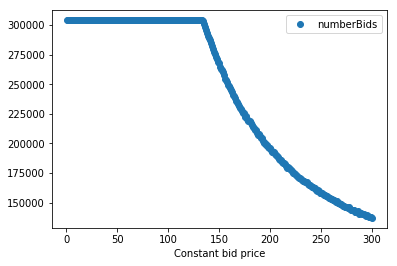

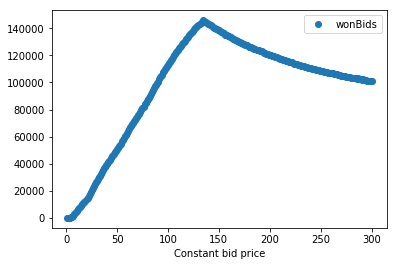

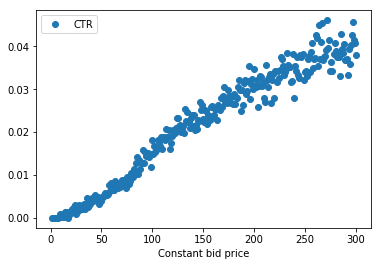

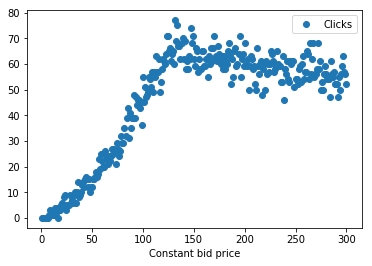

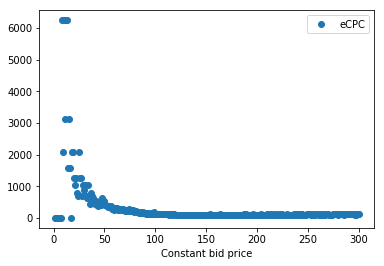

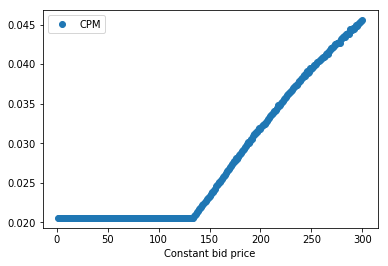

In [23]:
summaryStatistics.plot(x='Constant bid price', y='numberBids', style='o'); summaryStatistics.plot(x='Constant bid price', y='wonBids', style='o')
summaryStatistics.plot(x='Constant bid price', y='CTR', style='o')
summaryStatistics.plot(x='Constant bid price', y='Clicks', style='o')
summaryStatistics.plot(x='Constant bid price', y='eCPC', style='o')
summaryStatistics.plot(x='Constant bid price', y='CPM', style='o')

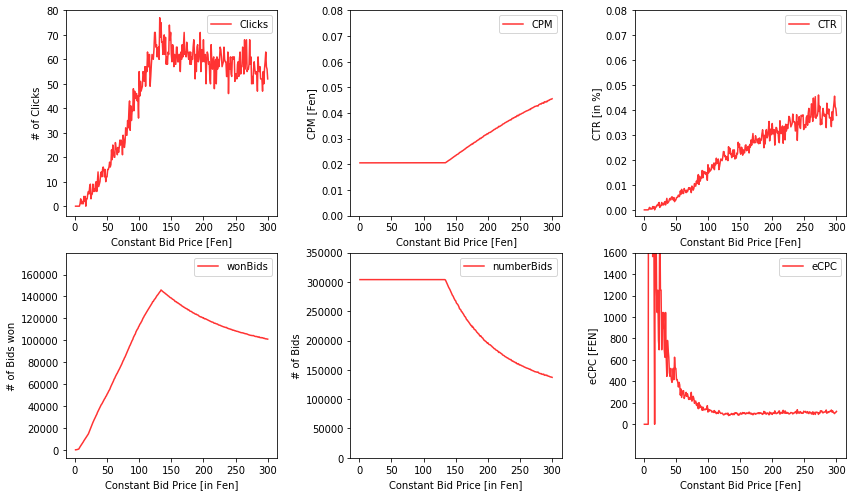

In [25]:
# VALIDATION SET - Budget of 6250
# plt.figure()
fig, axes = plt.subplots(nrows= 2, ncols = 3, figsize=(12,7) )


#Clicks - 1
ax1= summaryStatistics.plot(ax=axes[0,0],x='Constant bid price', y='Clicks',color ='red', alpha = 0.8)
ax1.set_ylabel('# of Clicks')
ax1.set_xlabel('Constant Bid Price [Fen]')
ax1.set_xticks(np.arange(0,305,50))
ax1.set_yticks(np.arange(0,100,10))
ax1.set_ylim(top=80)
# ymax = summaryStatistics['Clicks'].max()
# xpos = numberClicks.index(ymax)
# xmax = summaryStatistics.iloc[xpos]['Constant bid price']
# ax1.annotate('local max', xy=(80,68), xytext=(80,73),
# arrowprops=dict(facecolor='black', shrink=0.05),)

#Impressions won - 2
ax2= summaryStatistics.plot(ax=axes[0,1],x='Constant bid price', y='CPM',color ='red', alpha = 0.8)
ax2.set_ylabel('CPM [Fen]')
ax2.set_xlabel('Constant Bid Price [Fen]')
ax2.set_xticks(np.arange(0,305,50))
ax2.set_yticks(np.arange(0,0.1,0.01))
ax2.set_ylim(top=0.08)

#Win ratio - 3
ax3= summaryStatistics.plot(ax=axes[0,2],x='Constant bid price', y='CTR',color ='red', alpha = 0.8)
ax3.set_ylabel('CTR [in %]')
ax3.set_xlabel('Constant Bid Price [Fen]')
ax3.set_xticks(np.arange(0,305,50))
ax3.set_yticks(np.arange(0,0.1,0.01))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax3.set_ylim(top=0.08)

#CTR -  4
ax4= summaryStatistics.plot(ax=axes[1,0],x='Constant bid price', y='wonBids',color ='red', alpha = 0.8)
ax4.set_ylabel('# of Bids won')
ax4.set_xlabel('Constant Bid Price [in Fen]')
ax4.set_xticks(np.arange(0,305,50))
ax4.set_yticks(np.arange(0,180000,20000))
ax4.set_ylim(top=180000)

#CPM - 5
ax5= summaryStatistics.plot(ax=axes[1,1],x='Constant bid price', y='numberBids',color ='red', alpha = 0.8)
ax5.set_ylabel('# of Bids')
ax5.set_xlabel('Constant Bid Price [in Fen]')
ax5.set_xticks(np.arange(0,305,50))
ax5.set_yticks(np.arange(0,1000000,50000))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax5.set_ylim(top=350000)

#eCPC - 6
ax6= summaryStatistics.plot(ax=axes[1,2],x='Constant bid price', y='eCPC',color ='red', alpha = 0.8)
ax6.set_ylabel('eCPC [FEN]')
ax6.set_xlabel('Constant Bid Price [Fen]')
ax6.set_xticks(np.arange(0,305,50))
ax6.set_yticks(np.arange(0,1800,200))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax6.set_ylim(top=1600)

plt.tight_layout(h_pad = 0.2)

#Save image
plt.savefig('numberBidsRandom.pdf',bbox_inches='tight')